## Introduction
Hello everyone, in this blog, we are going to perform EDA on Nepali News that I scraped back in 2021. EDA is the basic step done in any Data Science project and here, we are going to perform simple analysis like counts of title, words and news in category.

## Import Necessary Modules
Lets import some necessary libraries to do classification using Naive Bayes in Python.
* `os` : The OS module in Python provides functions for interacting with the operating system and file systems.
* `pandas` : Working for DataFrame
* `numpy` : For array operation.
* `matplotlib` : For visualization 
* `seaborn` : For more effictive data visualization.
* `warnings` : Warnings is used to supress the warnings.
* `wordcloud` : To build word cloud.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pprint
import os

plt.style.use("seaborn-whitegrid")
from wordcloud import WordCloud

The generic font family is listed as a backup in case the system does not have either of these but has another serif. In order to show Devanagari font in the plots, we will be using Mangal Font. Which is available in the internet and i placed it in my working directory.

In [ ]:
font_path = '/content/drive/MyDrive/News Scraping/News classification/Mangal Regular.ttf'
font_prop = FontProperties(fname=font_path ,size=25)


## Load CSV file
Currently the data is [in my google drive](https://drive.google.com/drive/folders/1eaZUvctC6mqK6kBxWOi5Ab-Jc5_rQBtO?usp=sharing). But I am doing all these ML tasks in my Google Colab so, I will read data from my drive. I also request you to read blog about [how I did scrape news](https://dataqoil.com/2021/03/20/nepali-news-annapurna-post-scrapping-using-beautifulsoup-and-python/).

Since we have CSV files for distinct day, we need all of the file's content to be combined before doing a modeling task. I have done following to merge different csv files. I regularly scraped the news these were saved in different csv file in each days. And I combined all csv file for the task.

In [ ]:
all_filenames = [i for i in os.listdir("/content/drive/MyDrive/News Scraping/data") if  ".csv" in i and "combined" not in i]
print(all_filenames)

['2021-03-25.csv', '2021-03-26.csv', '2021-03-27.csv', '2021-03-28.csv', '2021-03-29.csv', '2021-03-30.csv', '2021-03-31.csv', '2021-04-01.csv', '2021-04-03.csv', '2021-04-04.csv', '2021-04-05.csv', '2021-04-06.csv', '2021-04-07.csv', '2021-04-08.csv', '2021-04-12.csv', '2021-04-13.csv', '2021-04-14.csv', '2021-04-15.csv', '2021-04-16.csv', '2021-04-17.csv', '2021-04-18.csv', '2021-04-19.csv', '2021-10-09.csv', '2021-10-10.csv', '2021-10-20.csv', '2021-10-21.csv', '2021-10-22.csv', '2021-10-23.csv', '2021-10-24.csv', '2021-10-25.csv', '2021-10-26.csv', '2021-10-27.csv', '2021-11-21.csv', '2021-11-22.csv', '2021-11-25.csv', '2021-11-28.csv', '2021-11-29.csv', '2021-11-30.csv', '2021-12-05.csv', '2021-12-25.csv', '2022-01-02.csv', '2022-01-04.csv', '2022-01-11.csv', '2022-01-13.csv', '2022-01-18.csv', '2022-03-26.csv', '2022-03-27.csv', '2022-04-04.csv']


In [ ]:
# get root of the data
root = "/content/drive/MyDrive/News Scraping/data/"

In [ ]:
combined_csv = pd.concat([pd.read_csv(root+f) for f in all_filenames])
df = combined_csv.copy()

# EDA on Title

## Data cleaning

Here we are going to clean our original data. Originally data contains noise as well as, many words which does not contribute any significant value on our task. In below code block we are going to remove these all noises.

* First we have a stopwords text file. 
* And then punctuation text file. 

Both of above files are available in [GitHub repo](https://github.com/iamdurga/Nepali-News-and-ML).

In [ ]:
stop_file = "/content/drive/MyDrive/News Scraping/News classification/nepali_stopwords.txt"
stop_words = []
with open(stop_file) as fp:
  lines = fp.readlines()
  stop_words =list( map(lambda x:x.strip(), lines))

punctuation_file = "/content/drive/MyDrive/News Scraping/News classification/nepali_punctuation (1).txt"
punctuation_words = []
with open(punctuation_file) as fp:
  lines = fp.readlines()
  punctuation_words =list( map(lambda x:x.strip(), lines))
punctuation_words

def preprocess_text(cat_data, stop_words, punctuation_words):
  new_cat = []
  noise = "1,2,3,4,5,6,7,8,9,0,०,१,२,३,४,५,६,७,८,९".split(",")
  
  for row in cat_data:
    words = row.strip().split(" ")      
    nwords = "" # []
    
    for word in words:
      if word not in punctuation_words and word not in stop_words:
        is_noise = False
        for n in noise:
          #print(n)
          if n in word:
            is_noise = True
            break
        if is_noise == False:
          word = word.replace("(","")
          word = word.replace(")","")
          # nwords.append(word)
          if len(word)>1:
            nwords+=word+" "
          
    new_cat.append(nwords.strip())
  # print(new_cat)
  return new_cat

title_clean = preprocess_text(["शिक्षण संस्थामा ज जनस्वास्थ्य 50 मापदण्ड पालना शिक्षा मन्त्रालयको निर्देशन"], stop_words, punctuation_words)
print(title_clean)


['शिक्षण संस्थामा जनस्वास्थ्य मापदण्ड पालना शिक्षा मन्त्रालयको निर्देशन']


We can see in the result above that the single letter ज is removed as well as 50.

Now making a new dataframe to do processing of text and use it later on.

In [ ]:
ndf = df.copy()
for i, row in ndf.iterrows():
  ndf.loc[i, "Title"]= preprocess_text([row.Title], stop_words, punctuation_words)[0]

#ndf


## Count of news per Category

In [ ]:
ndf[["Title","Category"]].groupby("Category").count()

,Title
Category,
business,2467
entertainment,1612
international,235
national,235
news,1981
prabhas-news,651
province,181
sports,692
technology,651


We can see there are 2467 news titles in business category similarly entertainment category contains 1612 news title and world category contain only 537 news title which is minimum among all. So there could be class imbalance if we try to classify news.

We plot bar plot of ablove frequency of title per category. Bar plot also shows that maximun news title are in business category.

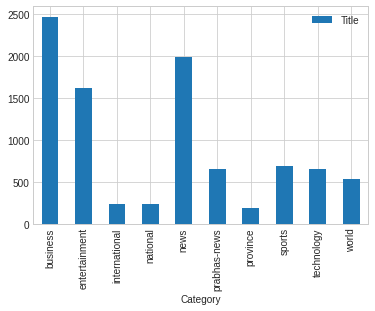

In [ ]:
ndf[["Title","Category"]].groupby("Category").count().plot(kind= "bar")

## Distribution of number of words per Title

The maximum number of times a word is repeated is seven. Other terms with frequencies of 4,5,6 are also  repeated as many times shown in the graph.

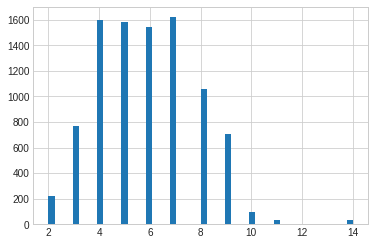

In [ ]:
ndf["title_words"] = ndf.Title.apply(lambda x : len(x.split(" ")))
ndf.title_words.hist(bins= 50)


## Distribution of overall words in title per category

We can observe from the graph that the national and provincial categories have the same overall number of words per category and the same minimum number of words. The ratio of words in sports, technology, and the worlds is also identical.

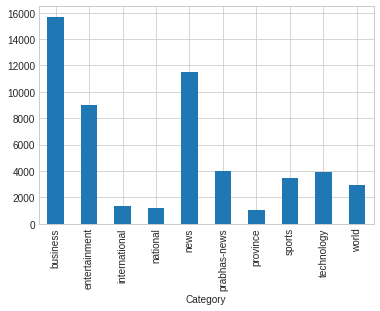

In [ ]:
ndf.groupby("Category").title_words.sum().plot(kind= "bar")

## Count of Average number of words  per category
 Figure shows that average numbers of words per category are in equal proportional.

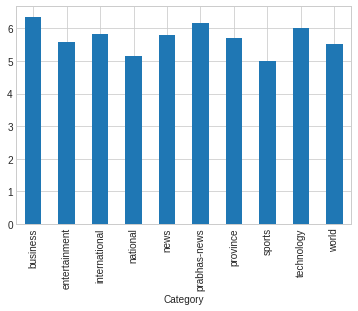

In [ ]:
ndf.groupby("Category").title_words.mean().plot(kind= "bar")

## Scatterness of words per category
Figure shows entertainment category have maximun standard deviation it's meaning is that maximun words are scatter or it contains different words.

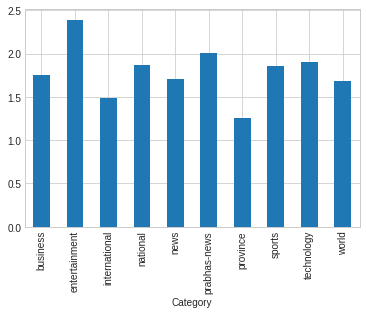

In [ ]:
ndf.groupby("Category").title_words.std().plot(kind= "bar")

## Maximum number of times a term appears in the Business category

The following code is used to plot a graph that supports the Nepali test. It's difficult to create a plot that includes a Nepali test. The 'plot nepali' function accepts the following arguments: pdict, fig size, fontsize, title, xlab, ylabel, and top. The complete code can be found in the code block below.

In [ ]:
#fig = plt.figure(figsize= (15,15))

#plt.rcParams["figure.figsize"] = (10, 10)
author_count = ndf.groupby(["Author"]).count().URL.to_dict()

def plot_nepali(pdict, figsize=(40, 15),fontsize=20, title="Bar Plot", xlabel="Author", ylabel="Frequency", top=5):
  # pdict = {k:v for k,v in pdict.items() if v>mw}
  pdict = {k: v for k, v in sorted(pdict.items(), key=lambda item: item[1], reverse=True)}
  npdict = {}
  cnt = 1

  for k, v in pdict.items():
    if cnt>top:
      break
    npdict[k]=v
    cnt+=1
  pdict=npdict

  plt.rcParams["figure.figsize"] = figsize
  ax = plt.subplot()

  val_val = pdict.values()
  key_val = pdict.keys()
  br = plt.bar(list(key_val), val_val)


  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
      label.set_fontproperties(font_prop)
      label.set_fontsize(fontsize)  # Size here overrides font_prop


  plt.title(title,
            size=22, verticalalignment='bottom')  # Size here overrides font_prop
  plt.xlabel(xlabel, fontsize=fontsize)
  plt.ylabel(ylabel, fontsize=fontsize)


  plt.show()


We use Counter in the following code to count the number of words in each category. It also removes the noses that are present in each category's news data. Following the preprocee text, call the previous method 'plot nepali'. The following bar blot can be seen. Take the x axis for words and the y axis for frequency. The plot of words for each category may be seen in the figure.

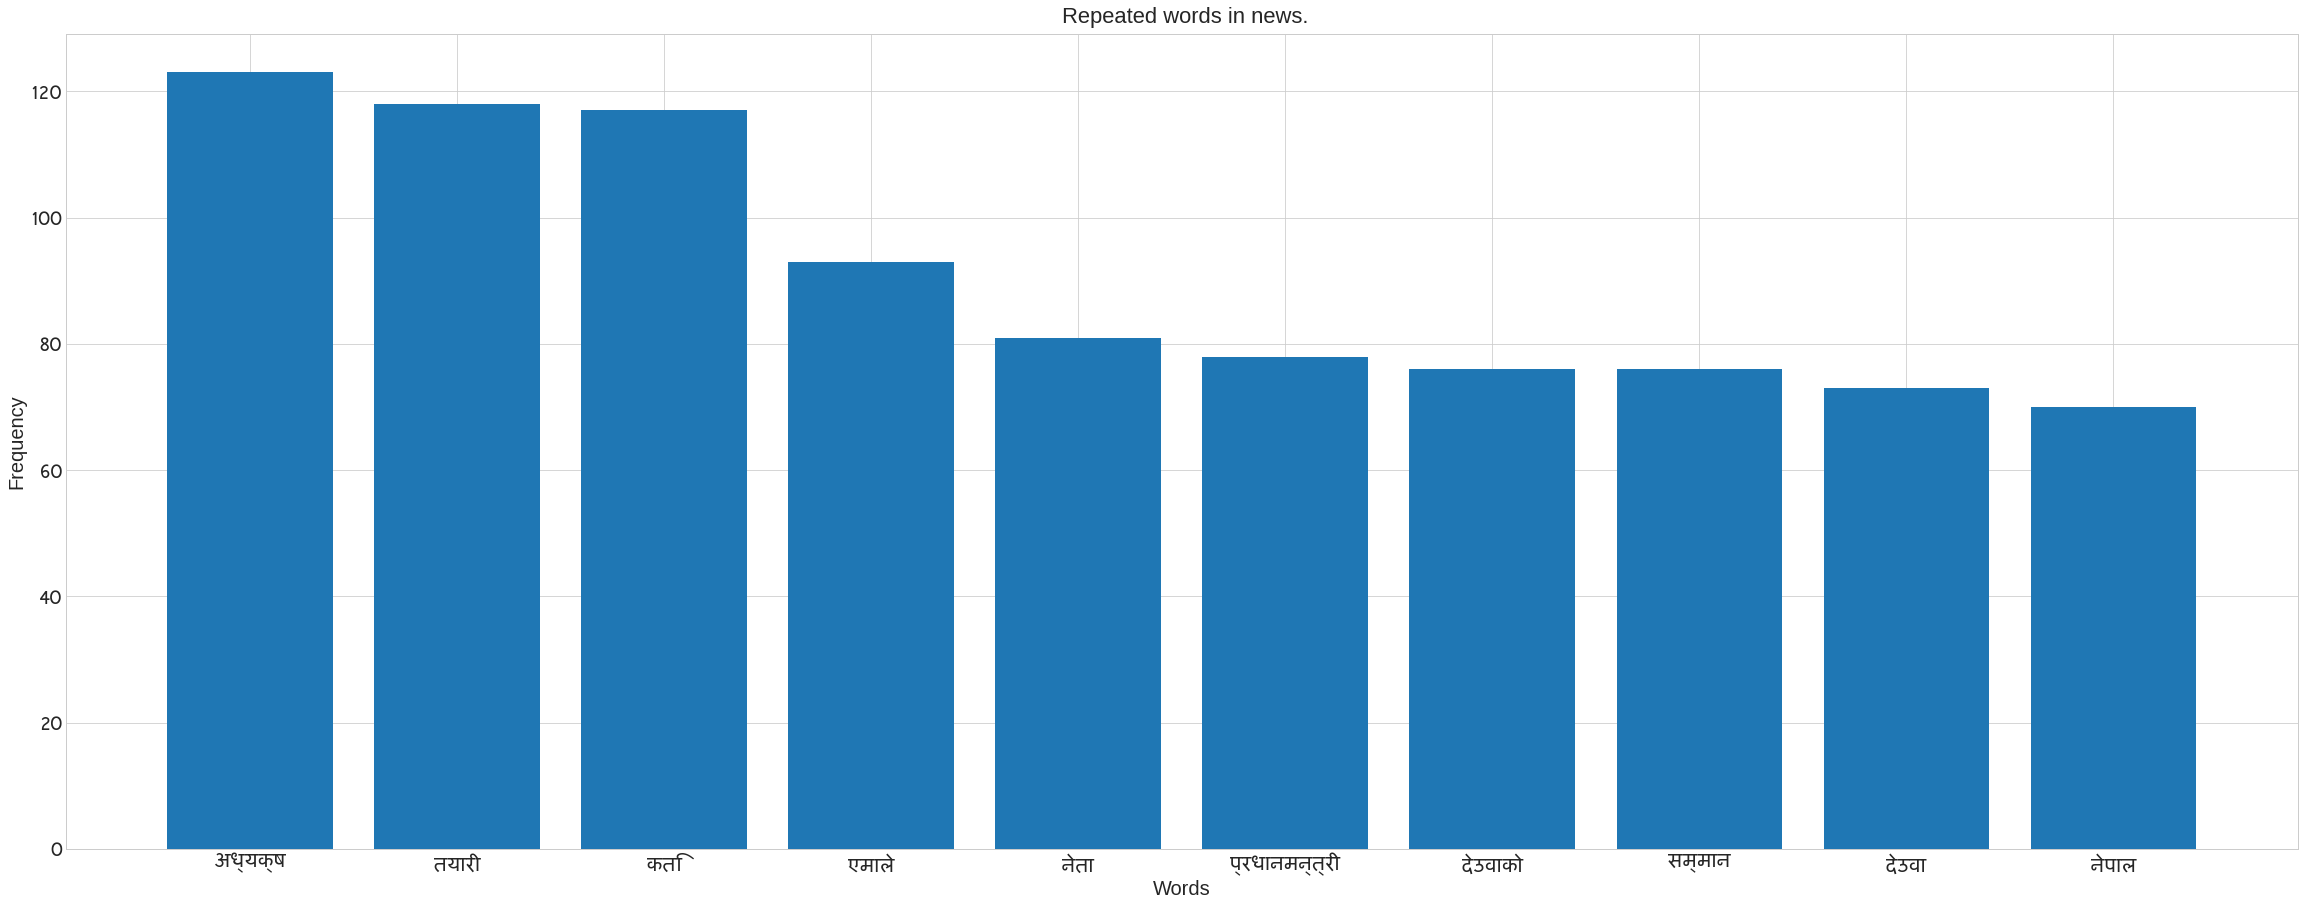

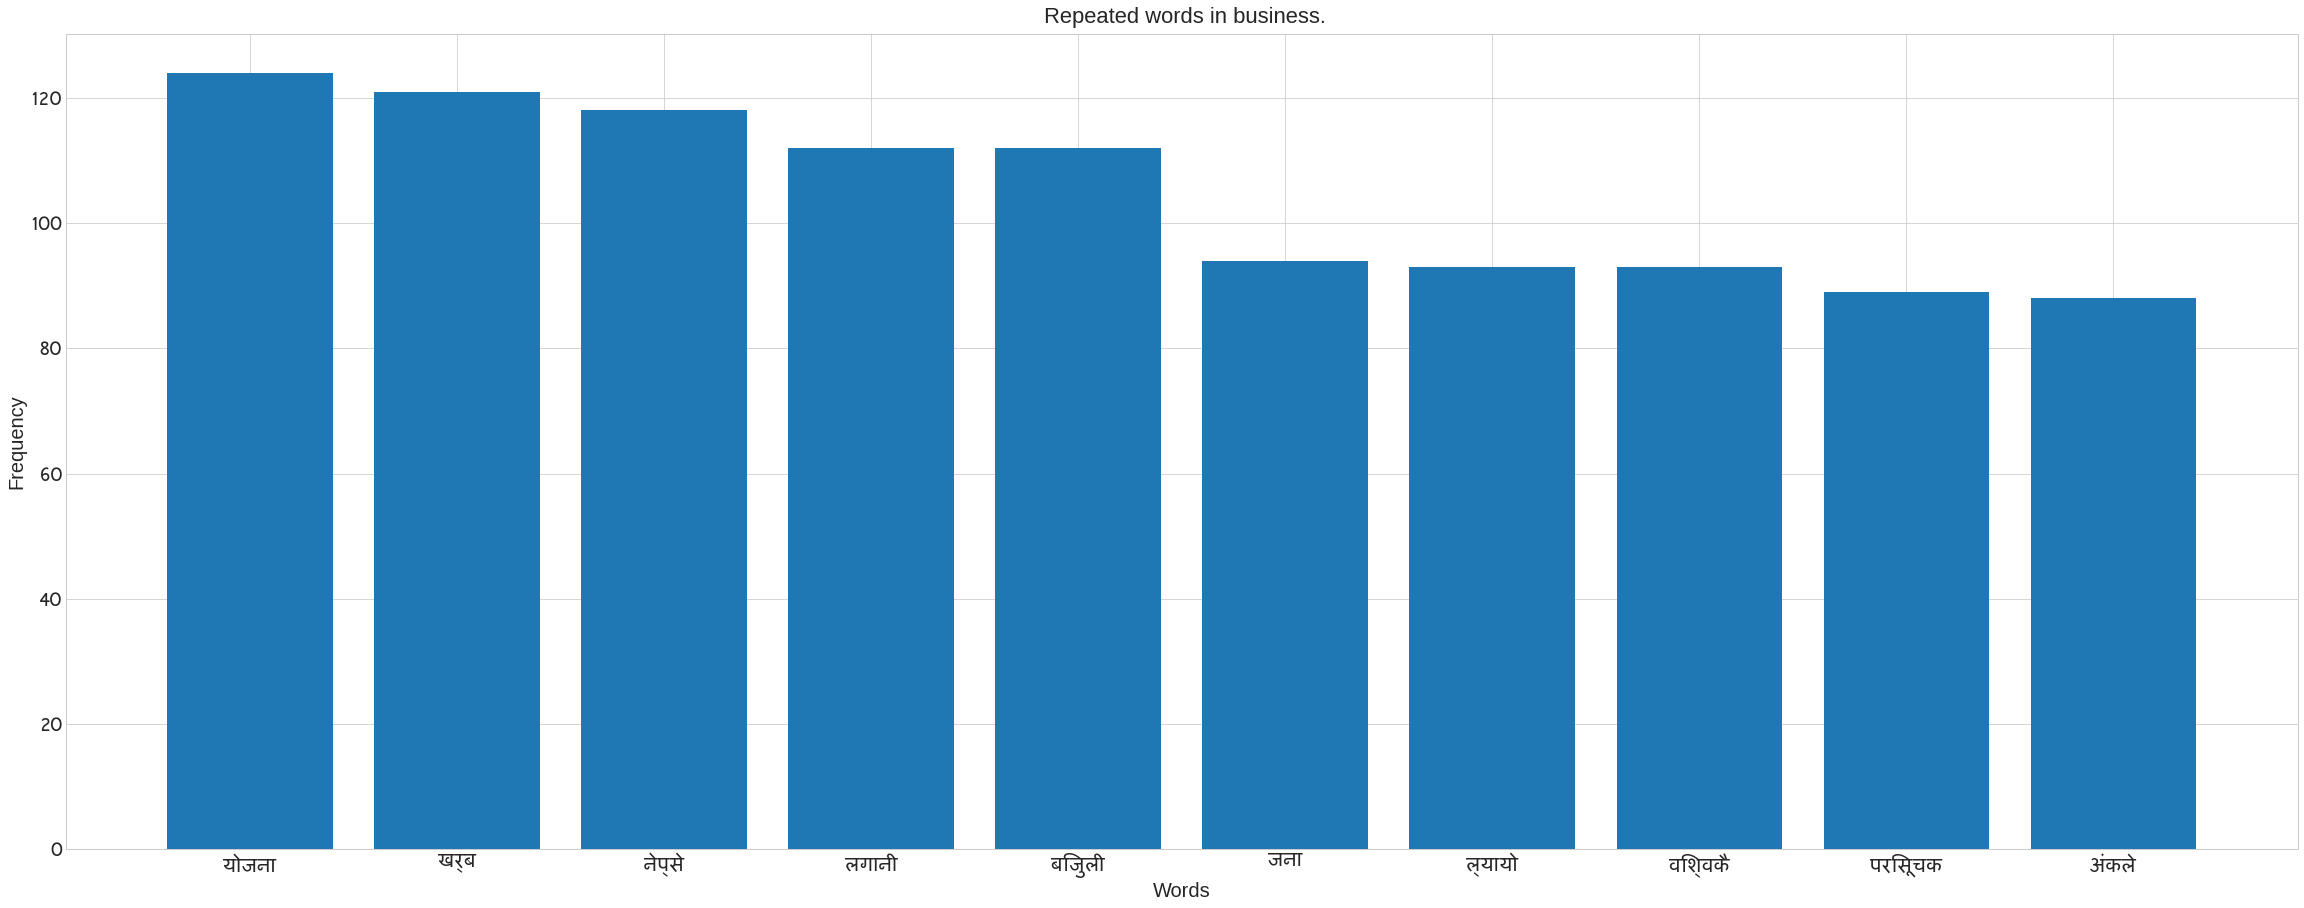

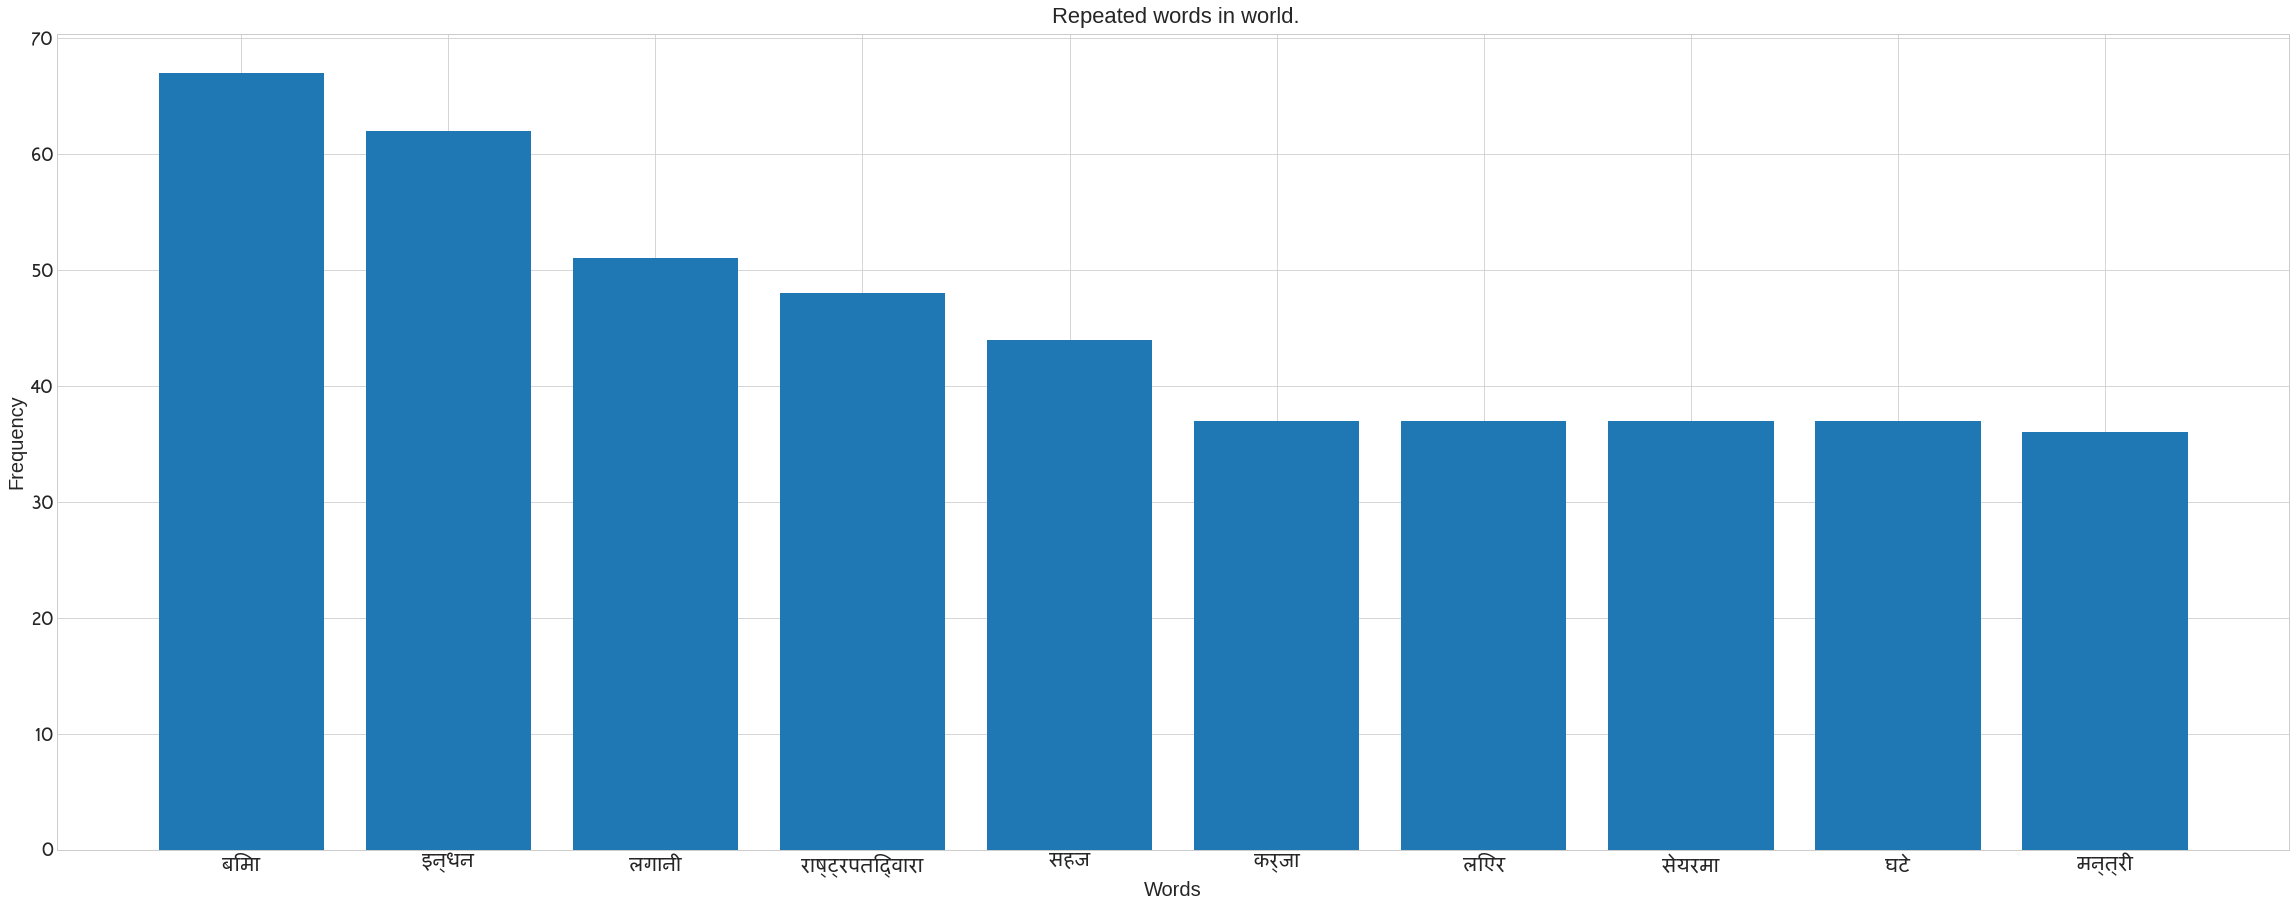

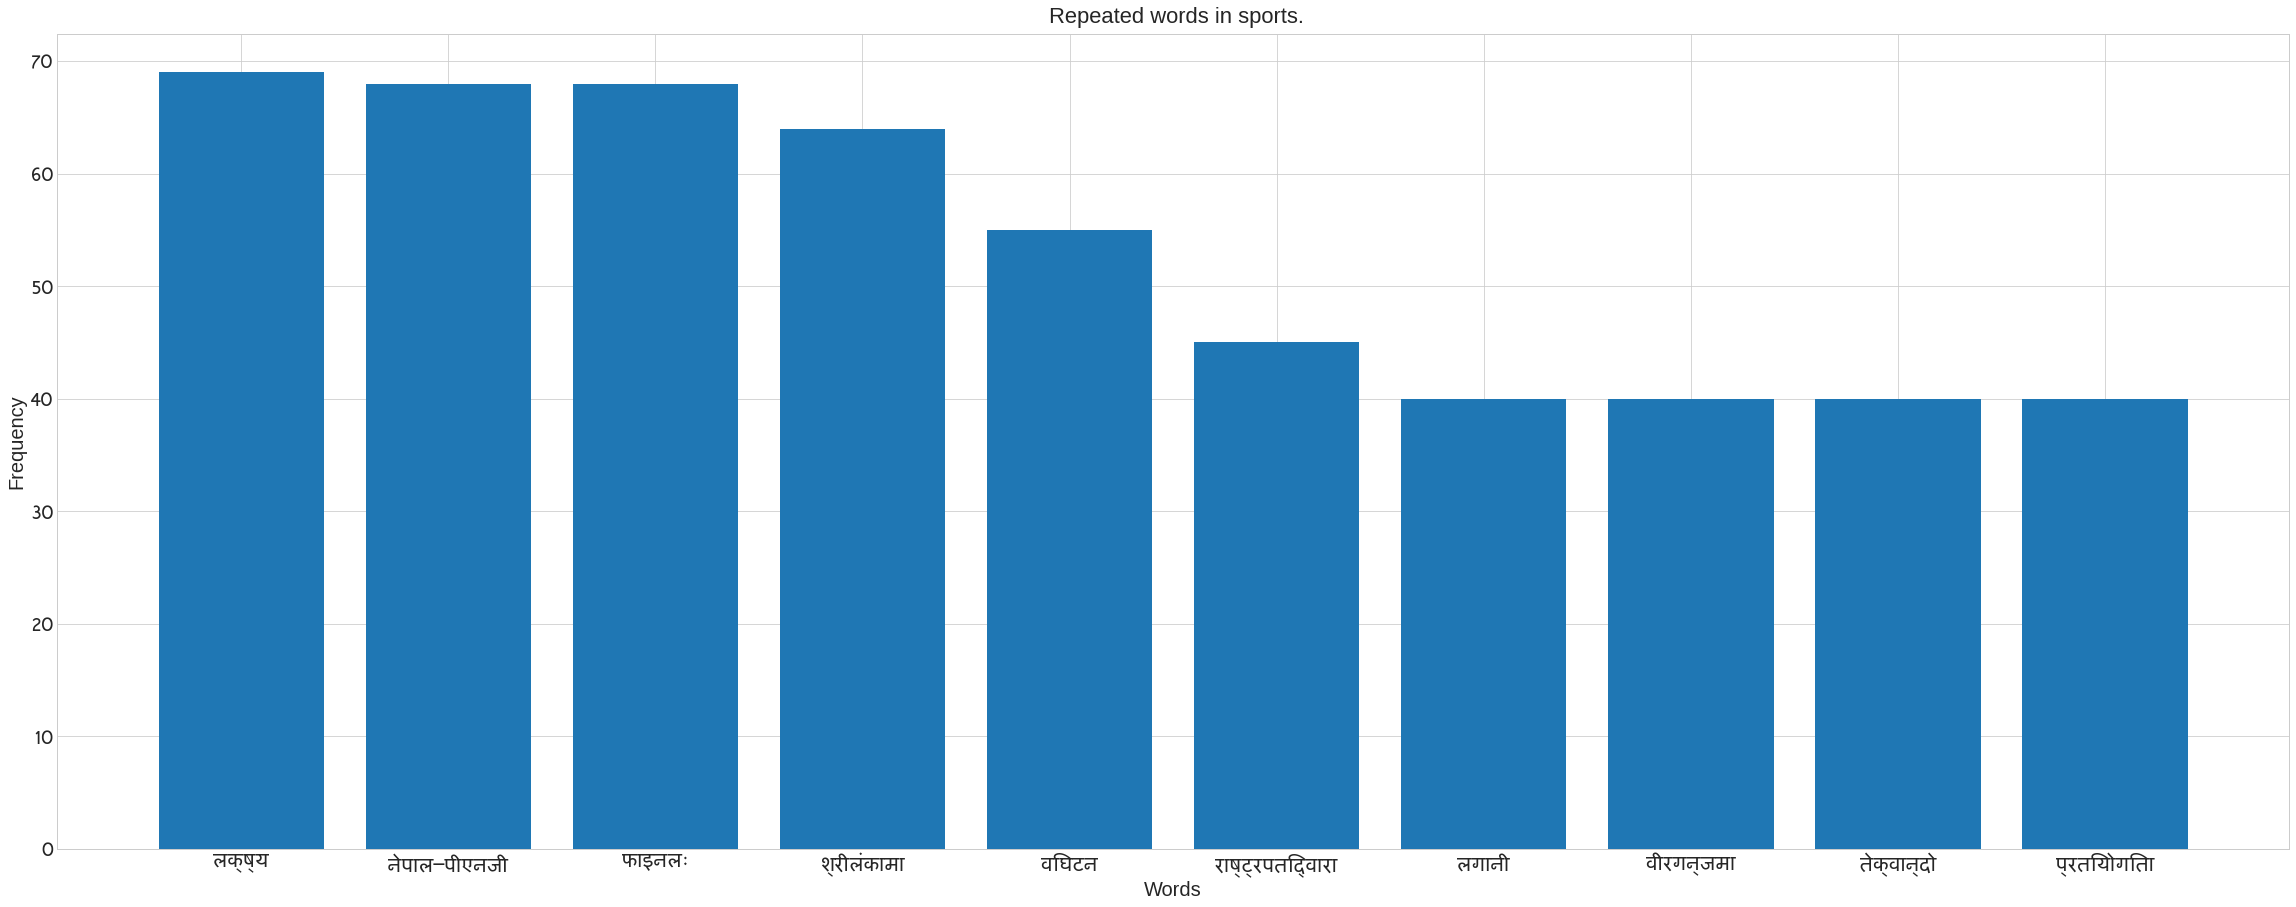

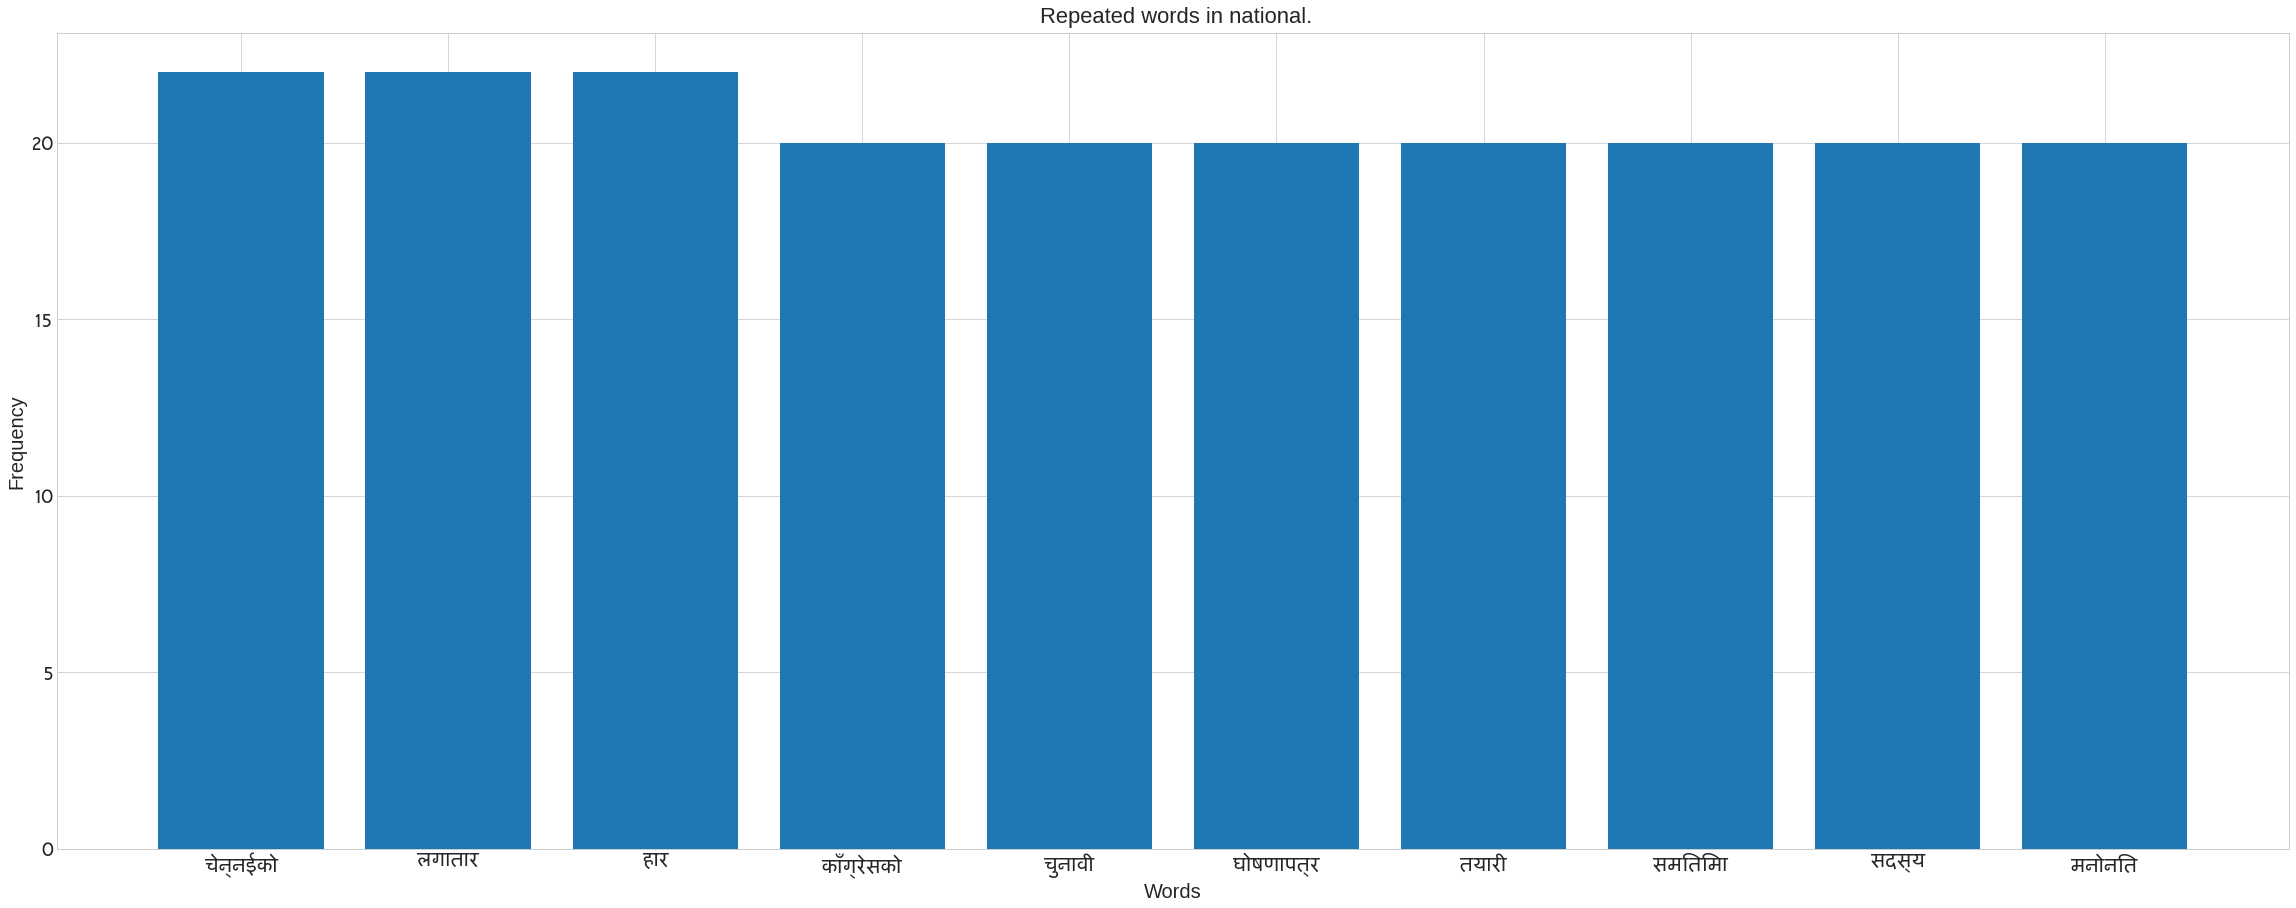

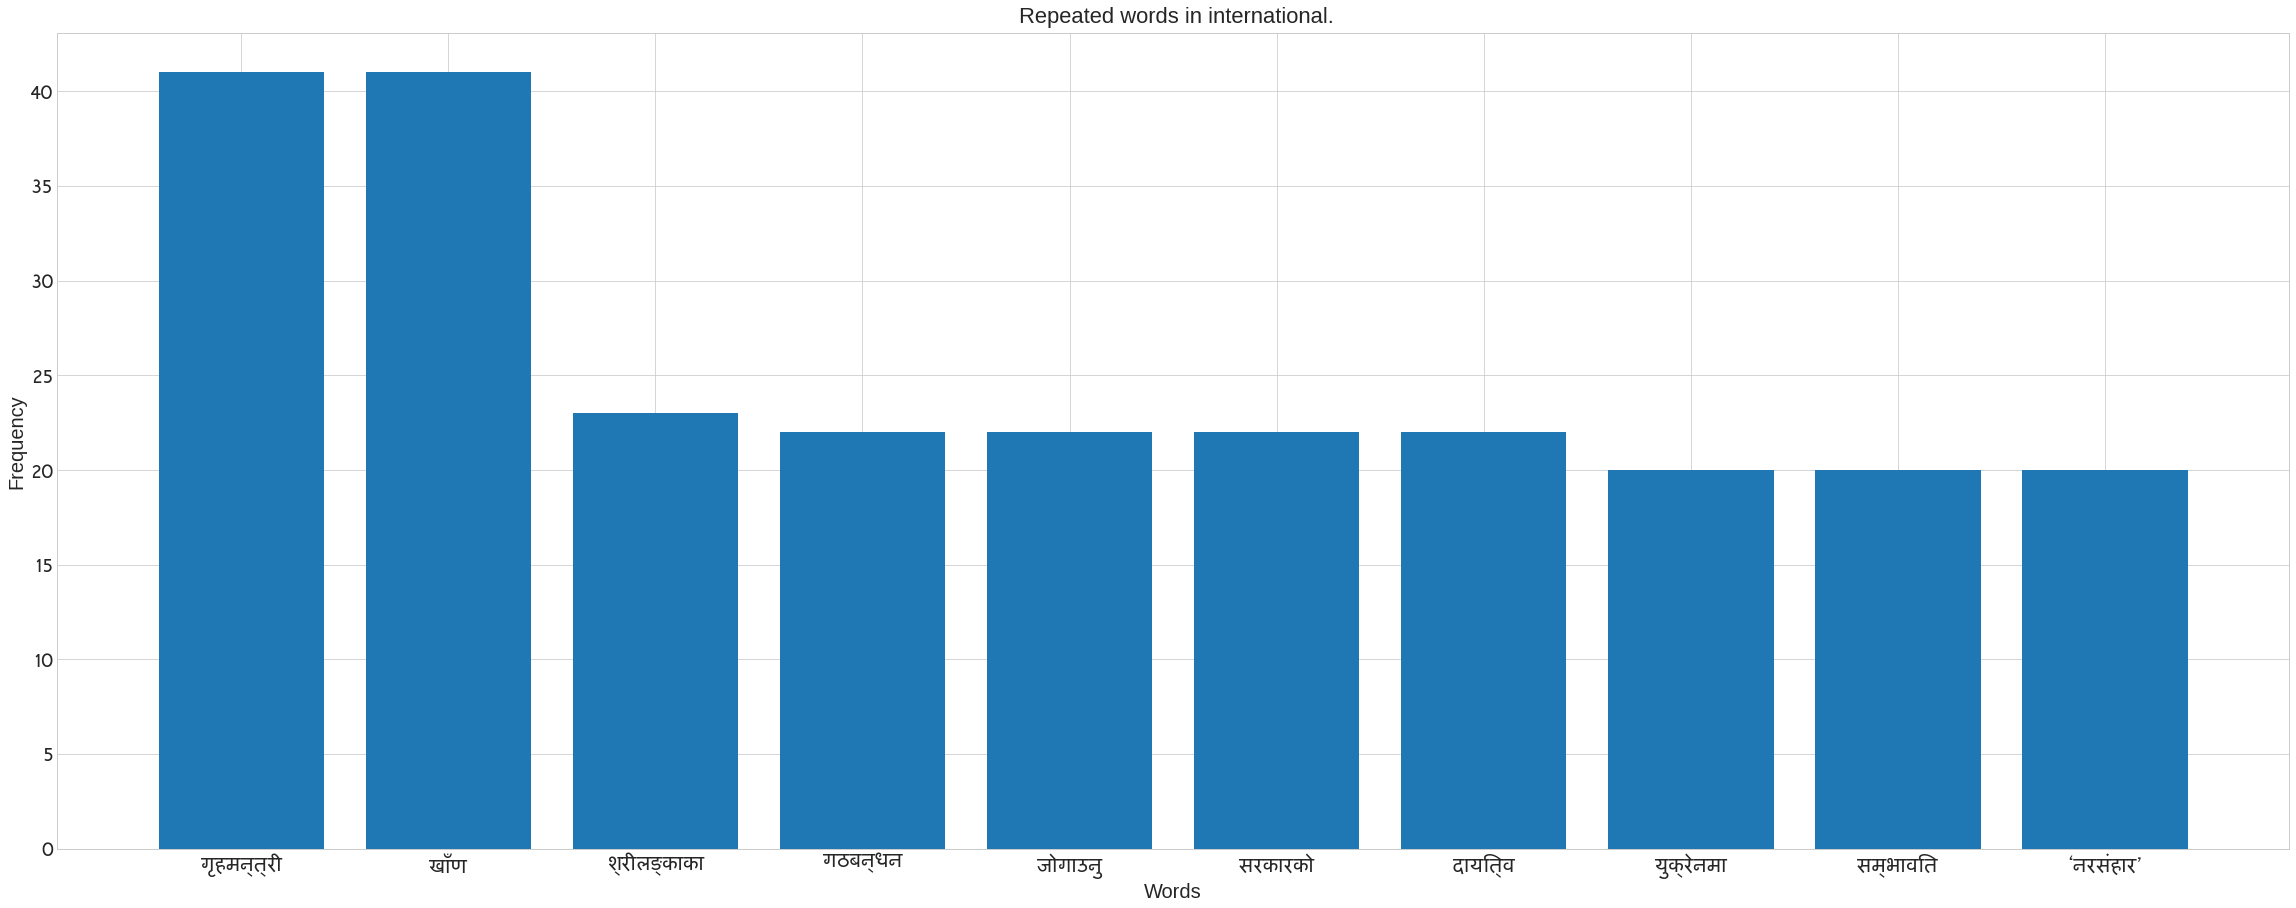

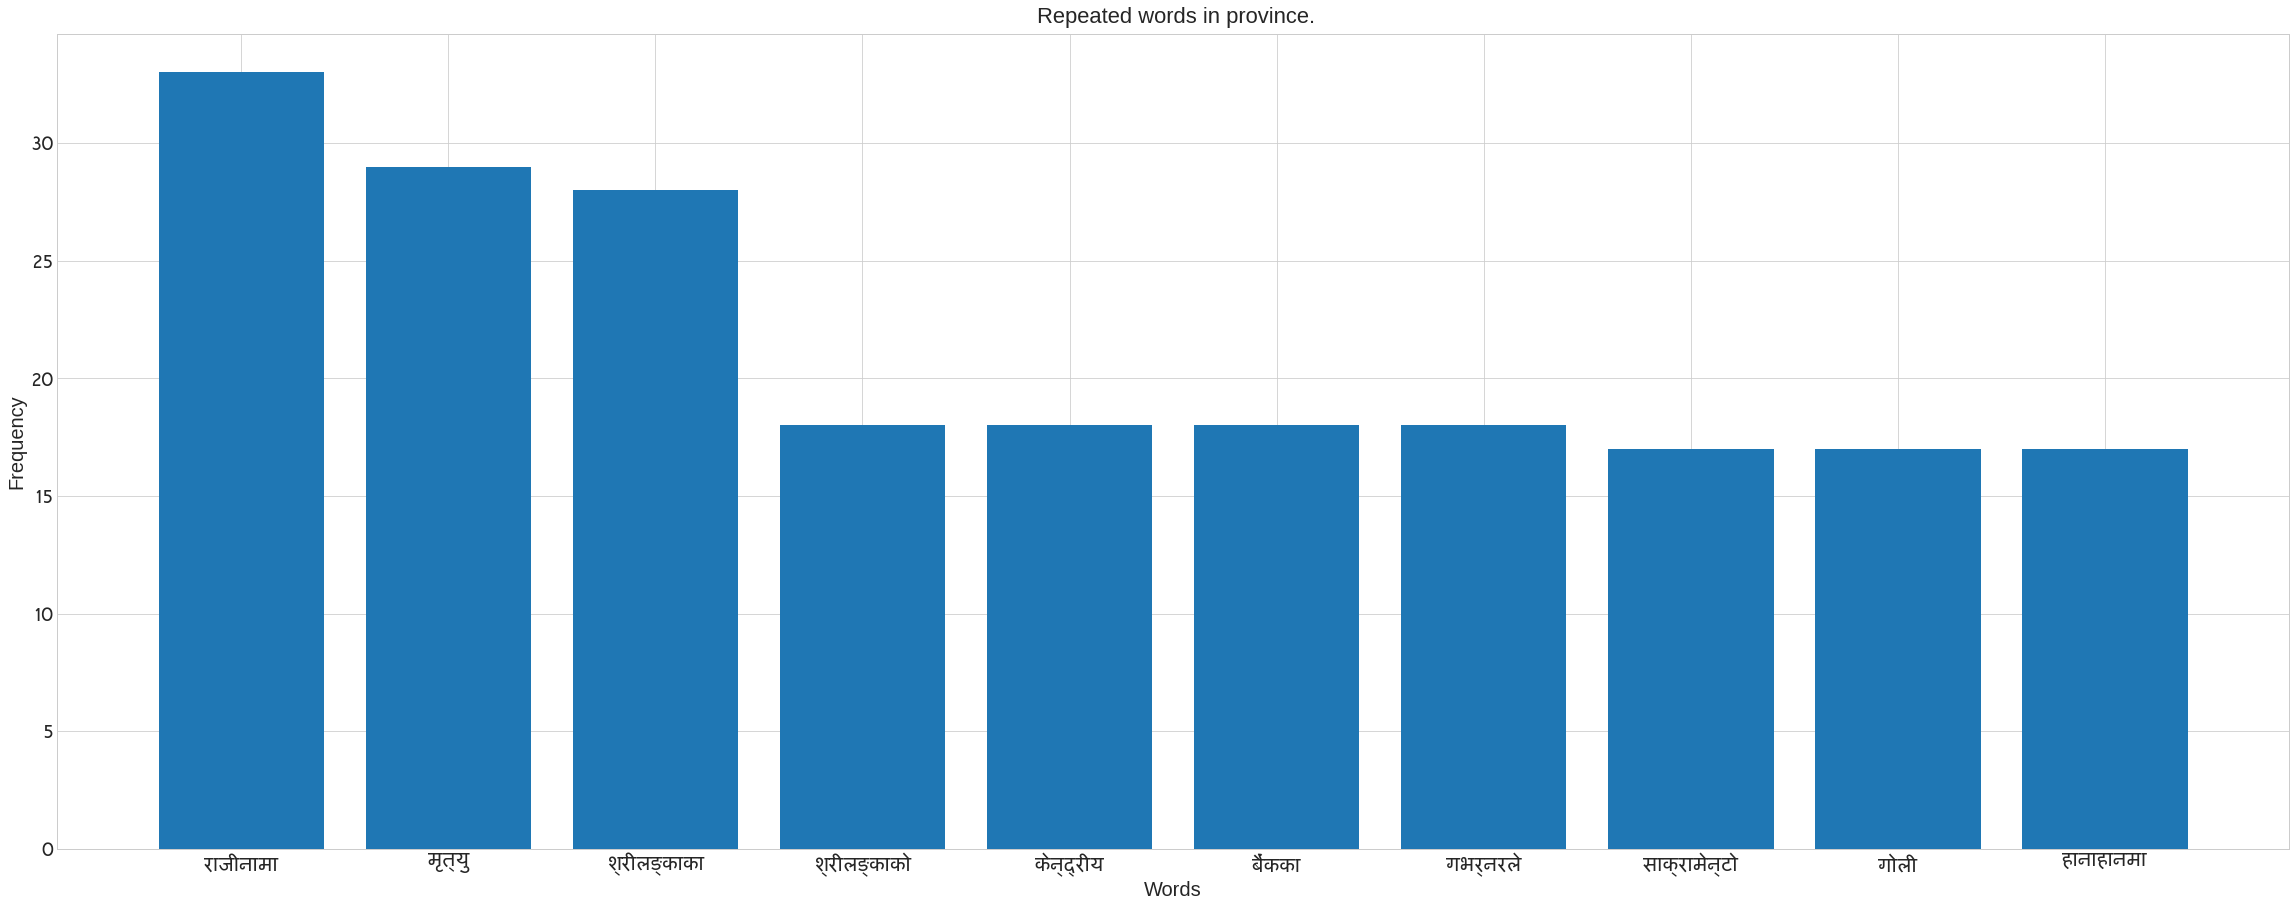

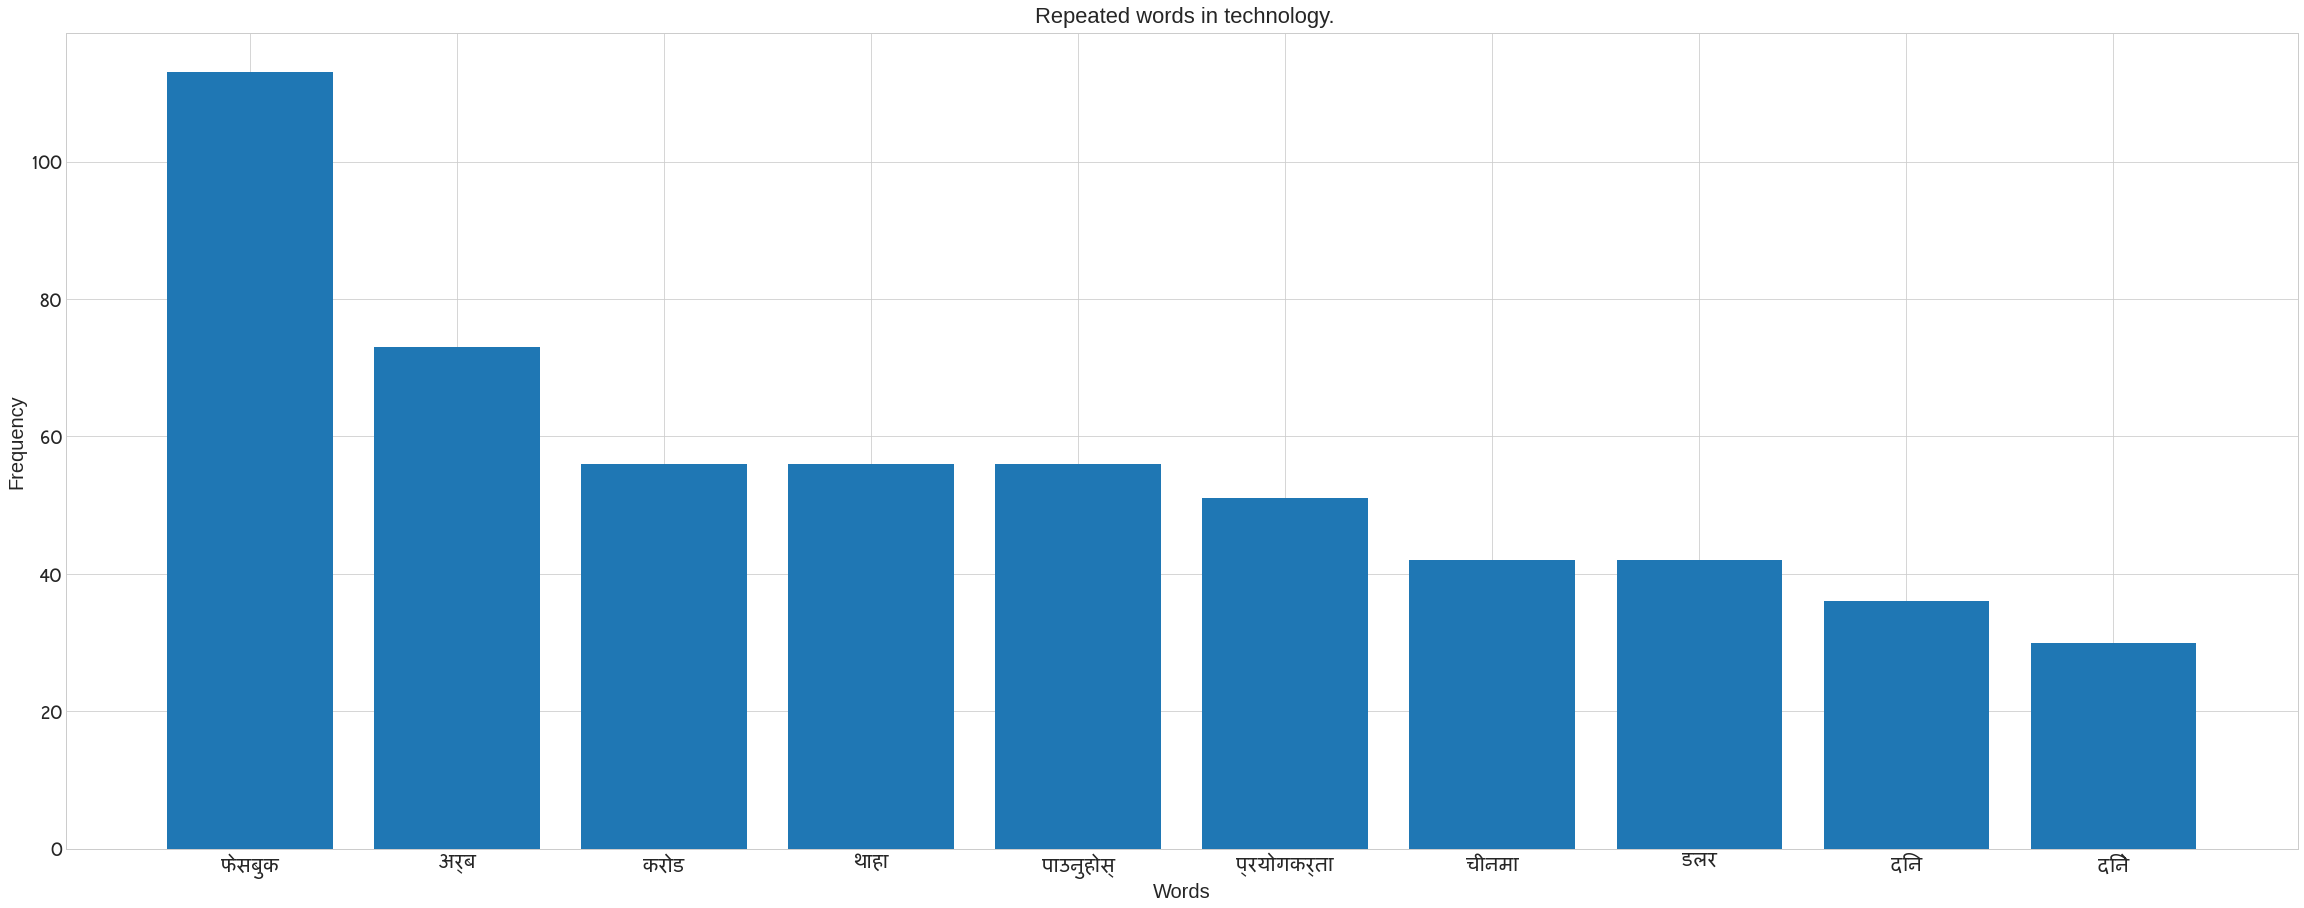

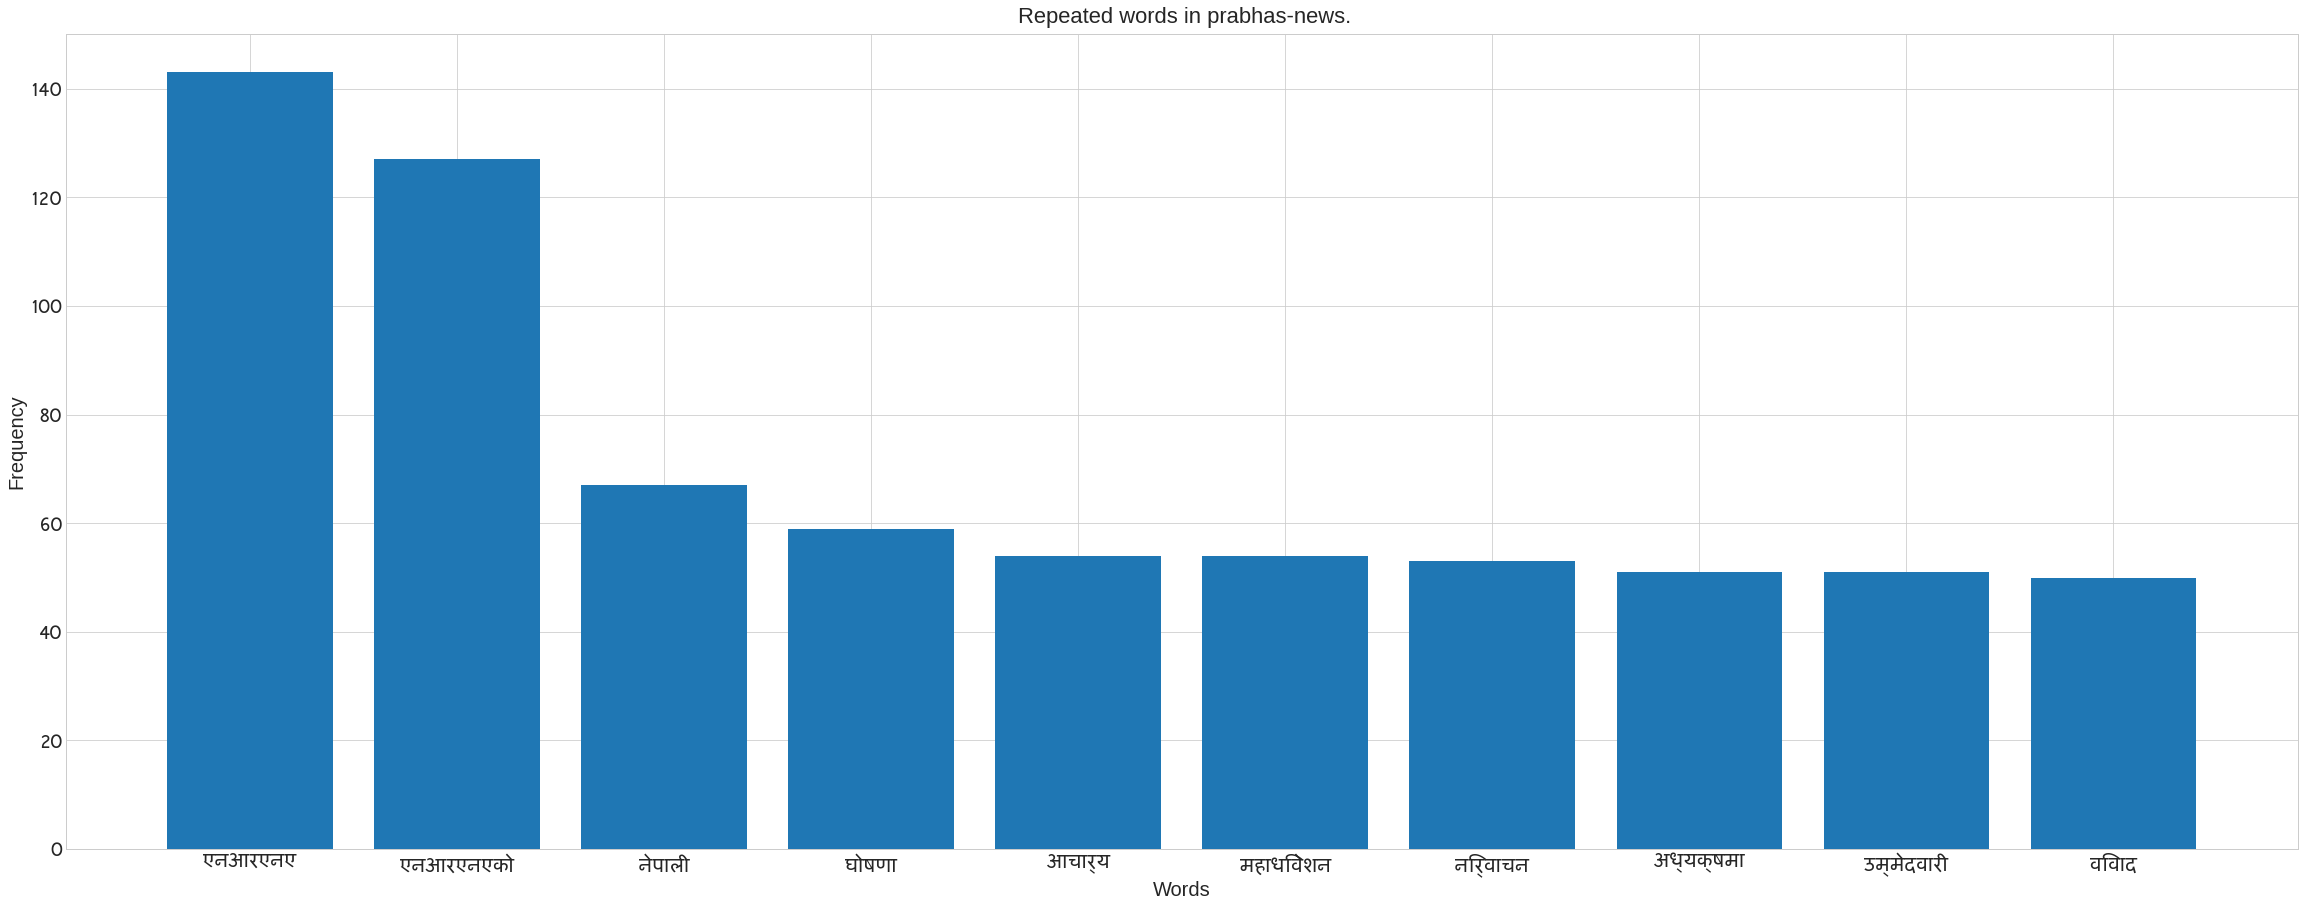

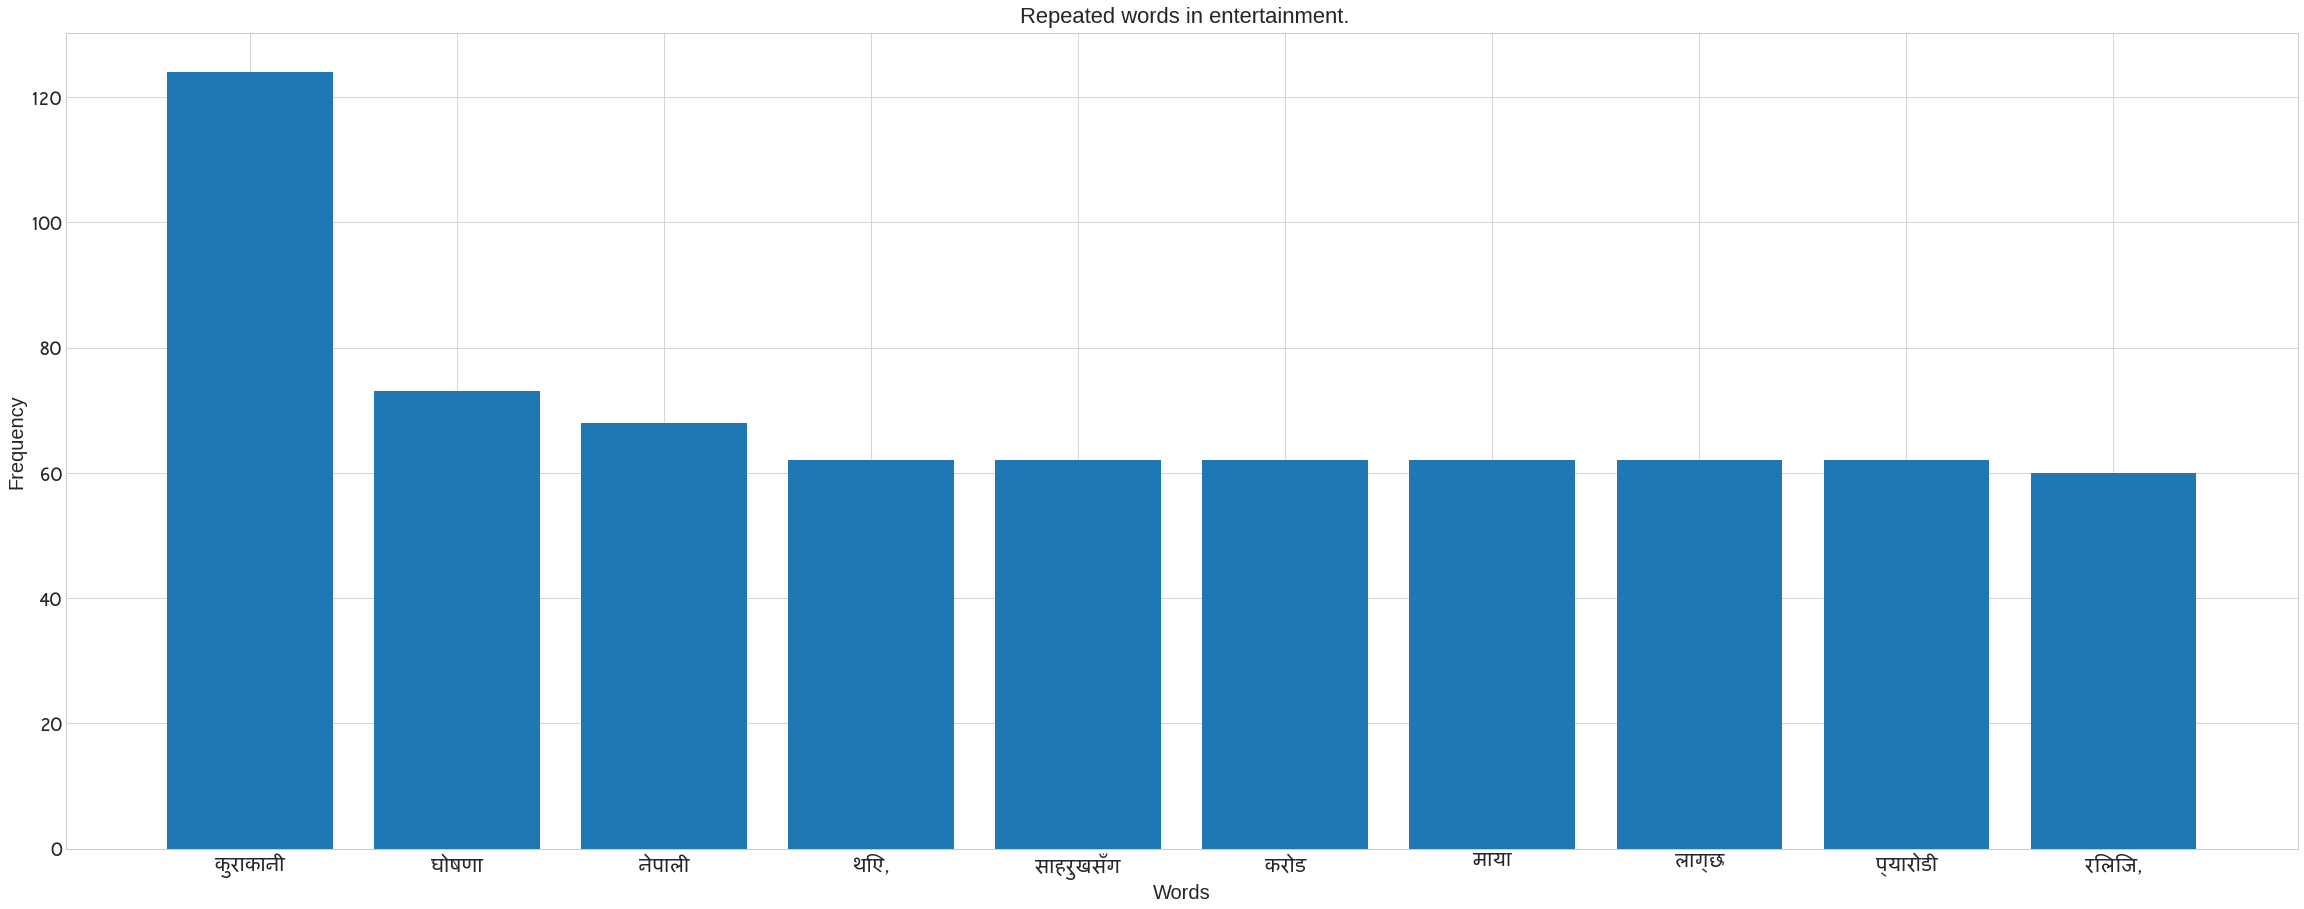

In [ ]:
#updated code
from collections import Counter
categories = ndf.Category.unique()
for cat in categories:
  #print(cat)
  tdf = ndf[ndf.Category==cat]
  cat_content = " ".join(tdf["Title"])
  words = cat_content.split()
  #print(words)
  noise = "?,—,।,।,४,३,७,१७,३१,१८,:,२,६६,५०,२०७८/७९,२४,(,७२,(१०,२१,।’,७२,३७२६,२२,(४,९१९,९.३६,(४,९००,०.५,छ,२५,४०,३०,छन्,६५,२७,४९,गर्\u200dयौ,४३७,१३९,प्रथम,८८०,६९६,२०७१,२०७१,२०१५)"
  nwords = []
  for word in words:
    if word not in noise:
      nwords.append(word)
  #print(nwords)
  word_count = [txt.strip() for txt in cat_content.split(" ")]
  word_count = dict(Counter(nwords))
  plot_nepali(word_count,top = 10, fontsize=20, title= f" Repeated words in {cat}.",xlabel="Words",ylabel= "Frequency")


## Creating a Word Cloud to See the Most Recurring Words in Each Category

Before I describe what the following code does, I'd like to learn more about word clouds.

**Word Cloud**: As the name implies, a word cloud is a collection of words. Which explains a specific author's whole written words. Organizational works, for example. Those with a larger frequency have a larger sizzle, while words with a smaller frequency have a smaller sizzle. We created a word cloud for each category in the graphic below.

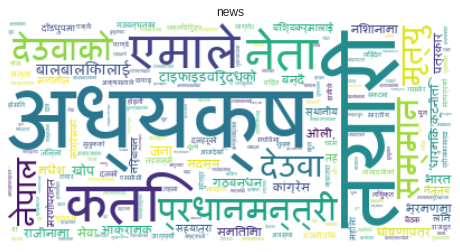

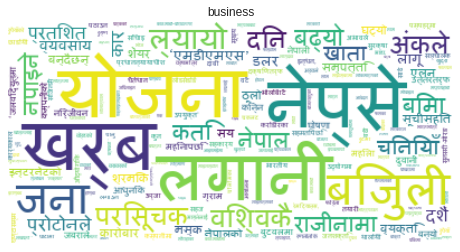

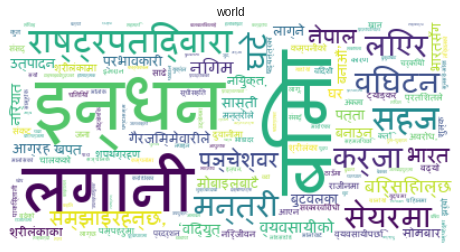

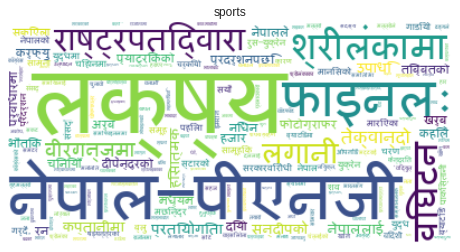

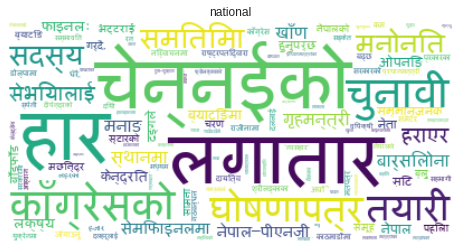

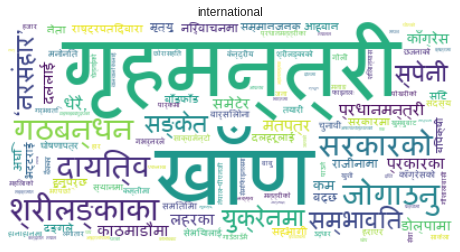

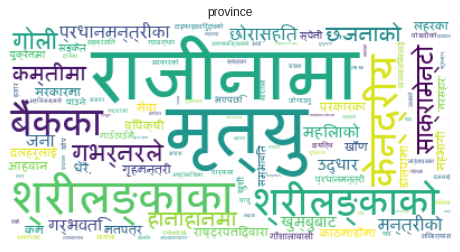

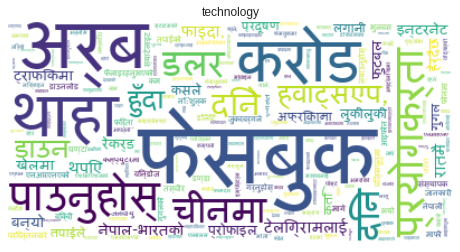

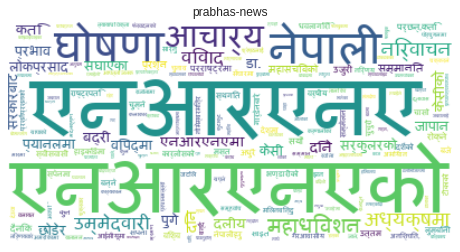

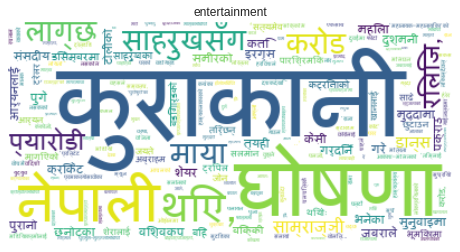

In [ ]:
categories = ndf.Category.unique()
for cat in categories:
  #print(cat)
  tdf = ndf[ndf.Category==cat]
  cat_content = " ".join(tdf["Title"])
  words = cat_content.split()
  #print(words)
  noise = "?,—,।,।,४,३,७,१७,३१,१८,:,२,६६,५०,२०७८/७९,२४,(,७२,(१०,२१,।’,७२,३७२६,२२,(४,९१९,९.३६,(४,९००,०.५,छ,२५,४०,३०,छन्,६५,२७,४९,गर्\u200dयौ,४३७,१३९,प्रथम,८८०,६९६,२०७१,२०७१,२०१५)"
  nwords = []
  for word in words:
    if word not in noise:
      nwords.append(word)
  nwords = dict(Counter(nwords))
  word_cloud = WordCloud(collocations = False,font_path= font_path, background_color = 'white').generate_from_frequencies(nwords)

  fig = plt.figure(figsize=(8,10))
  plt.imshow(word_cloud, interpolation="bilinear")
  # remove plot axes
  plt.axis("off")
  plt.title(cat)
  plt.show()
  # break

# EDA on News Content

Now we are going to do EDA on news content. 

In [ ]:
ndf = df.copy()
ndf = ndf[~ndf.Content.isna()]
for i, row in ndf.iterrows():
  ndf.loc[i, "Content"]= preprocess_text([row.Content], stop_words, punctuation_words)[0]

#ndf


## Count of Number of words per Content

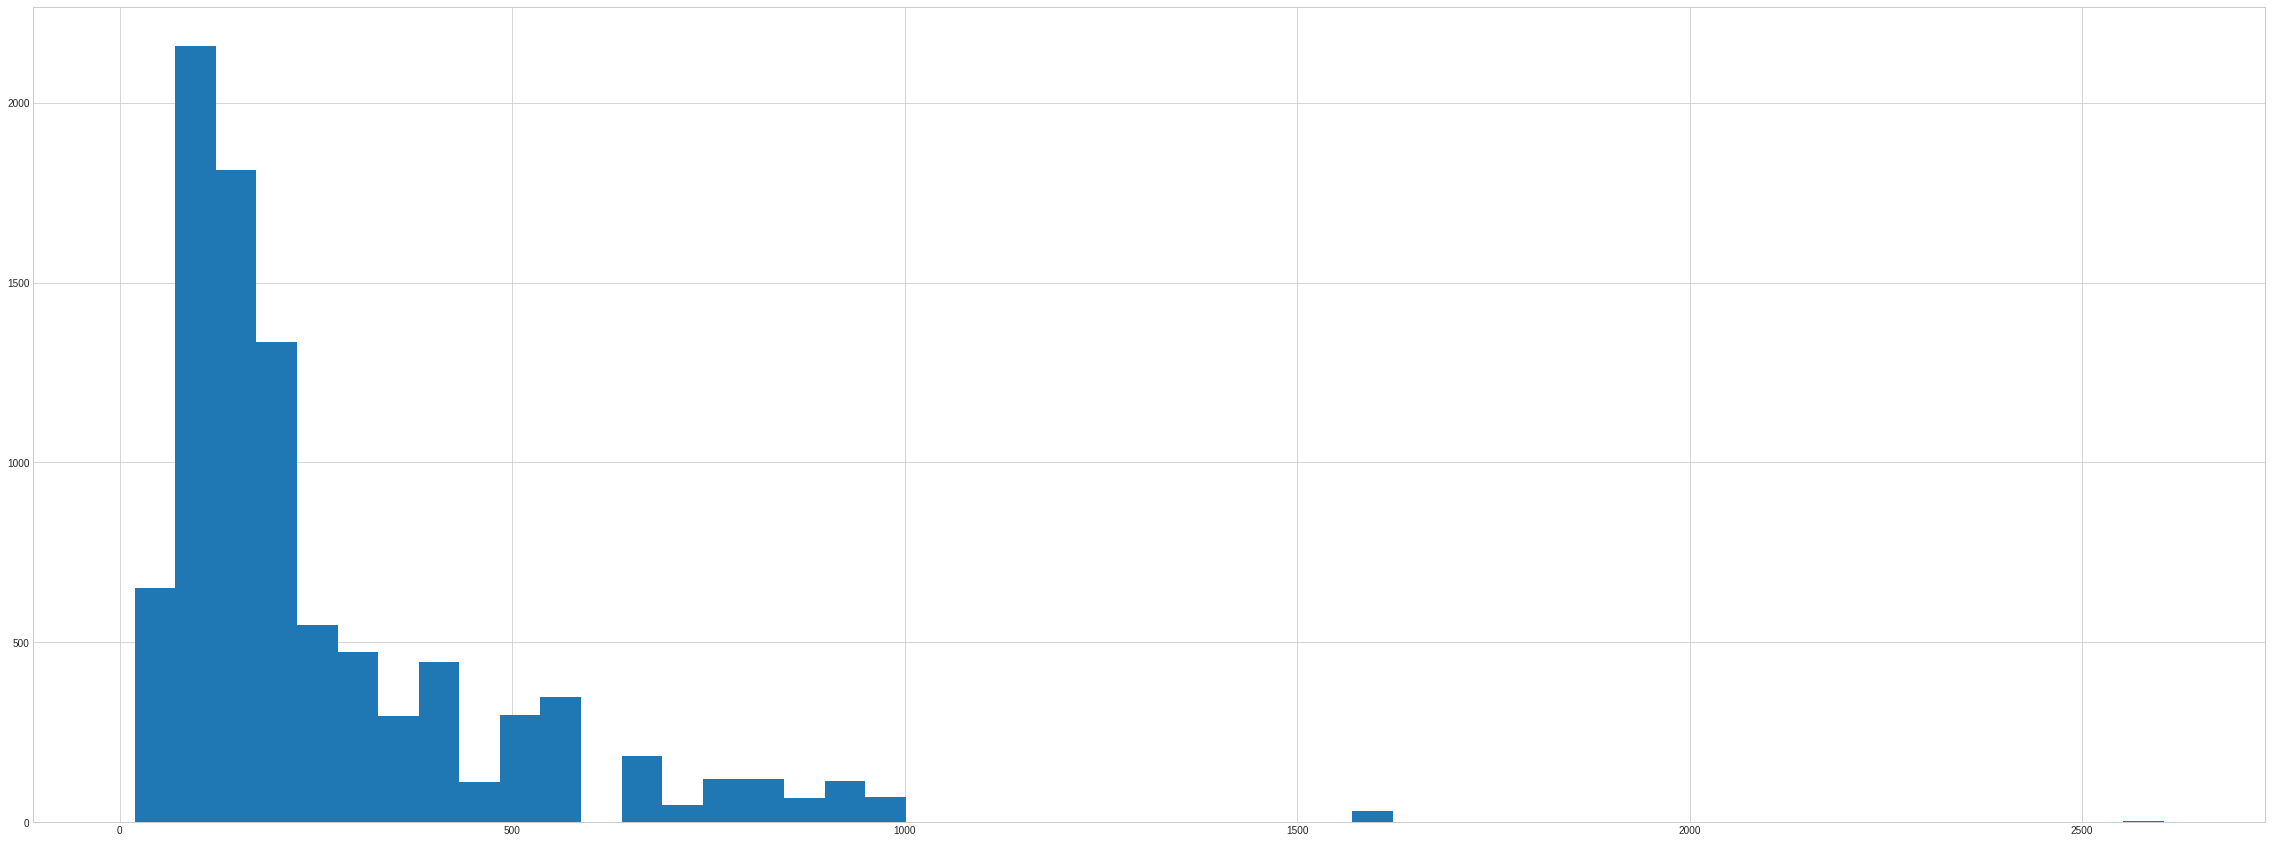

In [ ]:
ndf["content_words"] = ndf.Content.apply(lambda x : len(x.split(" ")))
ndf.content_words.hist(bins= 50)


## Class Imblance
Here we have 10 category of data but distribution of all category is not equal. Hence it affect the performance of our data. When Distibution of category used in our purpose are very skewed then it is called class imbalance. In case of number of words distributed in Title we can see following figure.



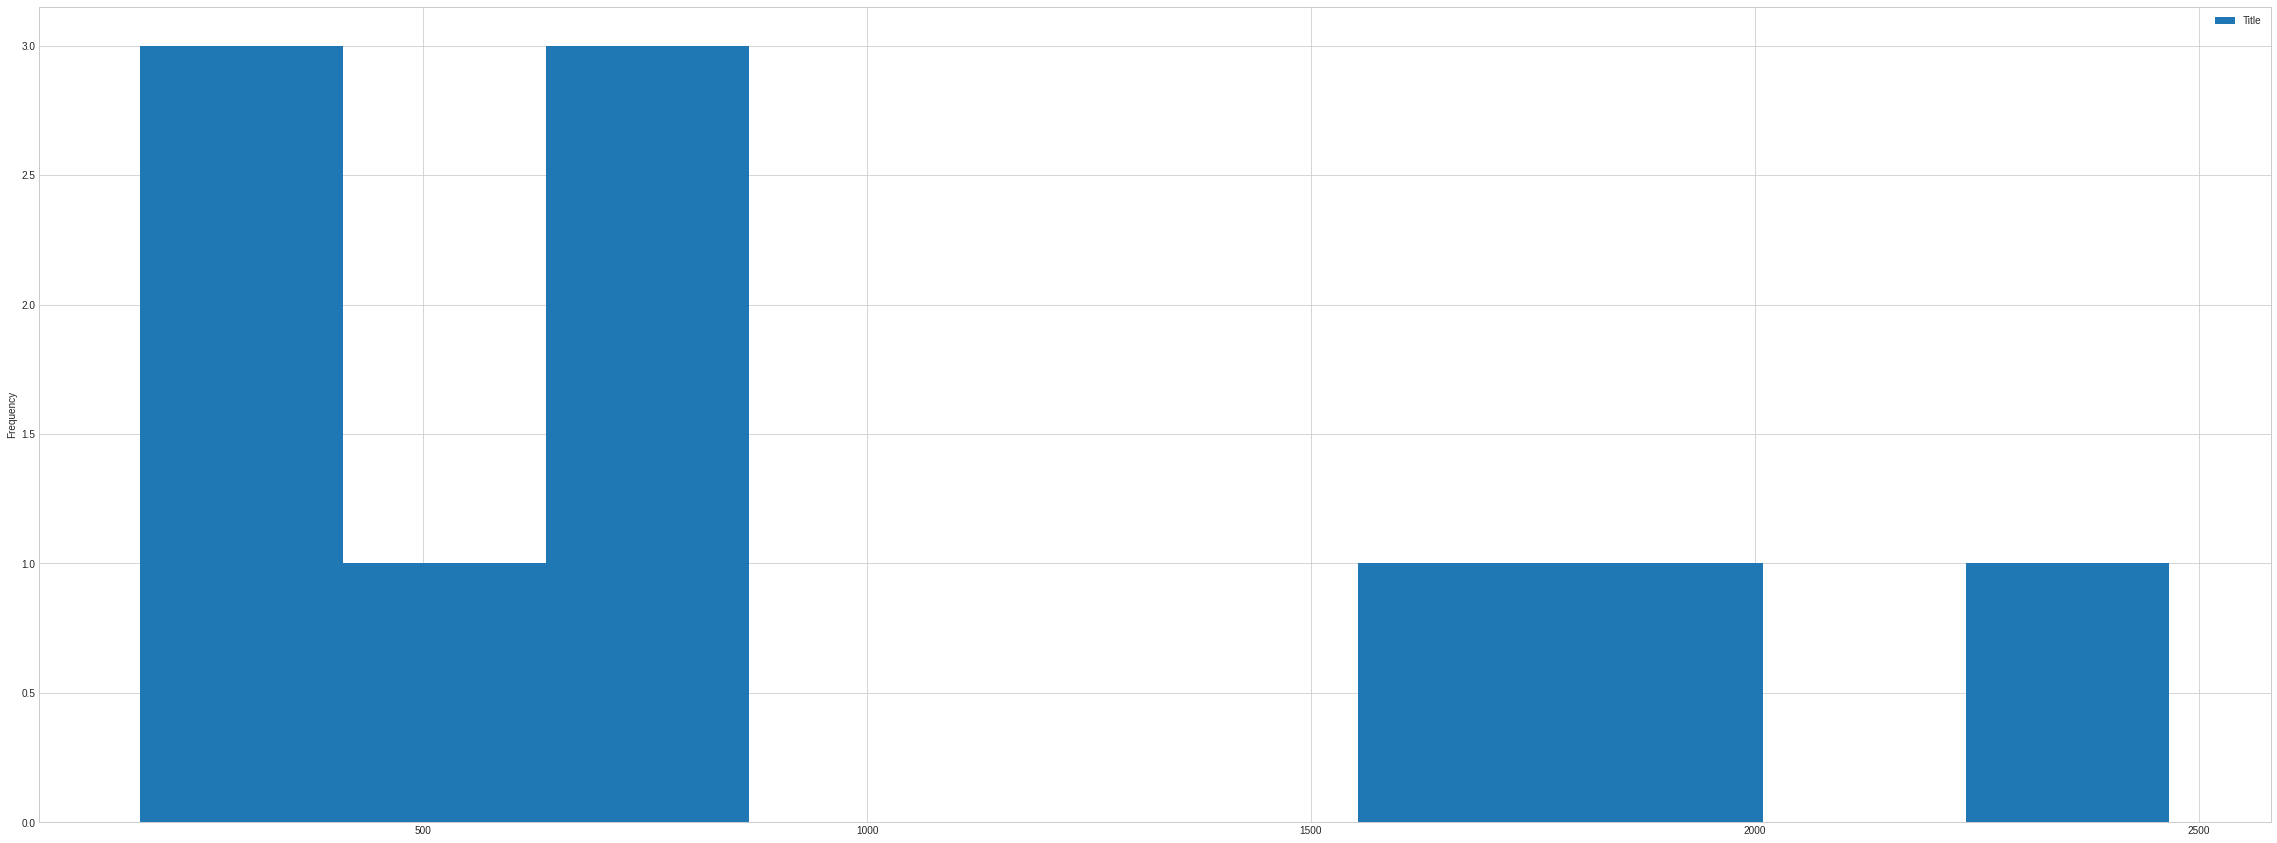

In [ ]:
ndf[["Title","Category"]].groupby("Category").count().plot(kind= "hist")

# How to Resolve Class Imbalance Problem
* We can merge two similar category like `world`, `international` into same category, `provience`, `prabhas-news` into same category.
* We can split or take the number of news which is equal to highest common factor of number of news.
